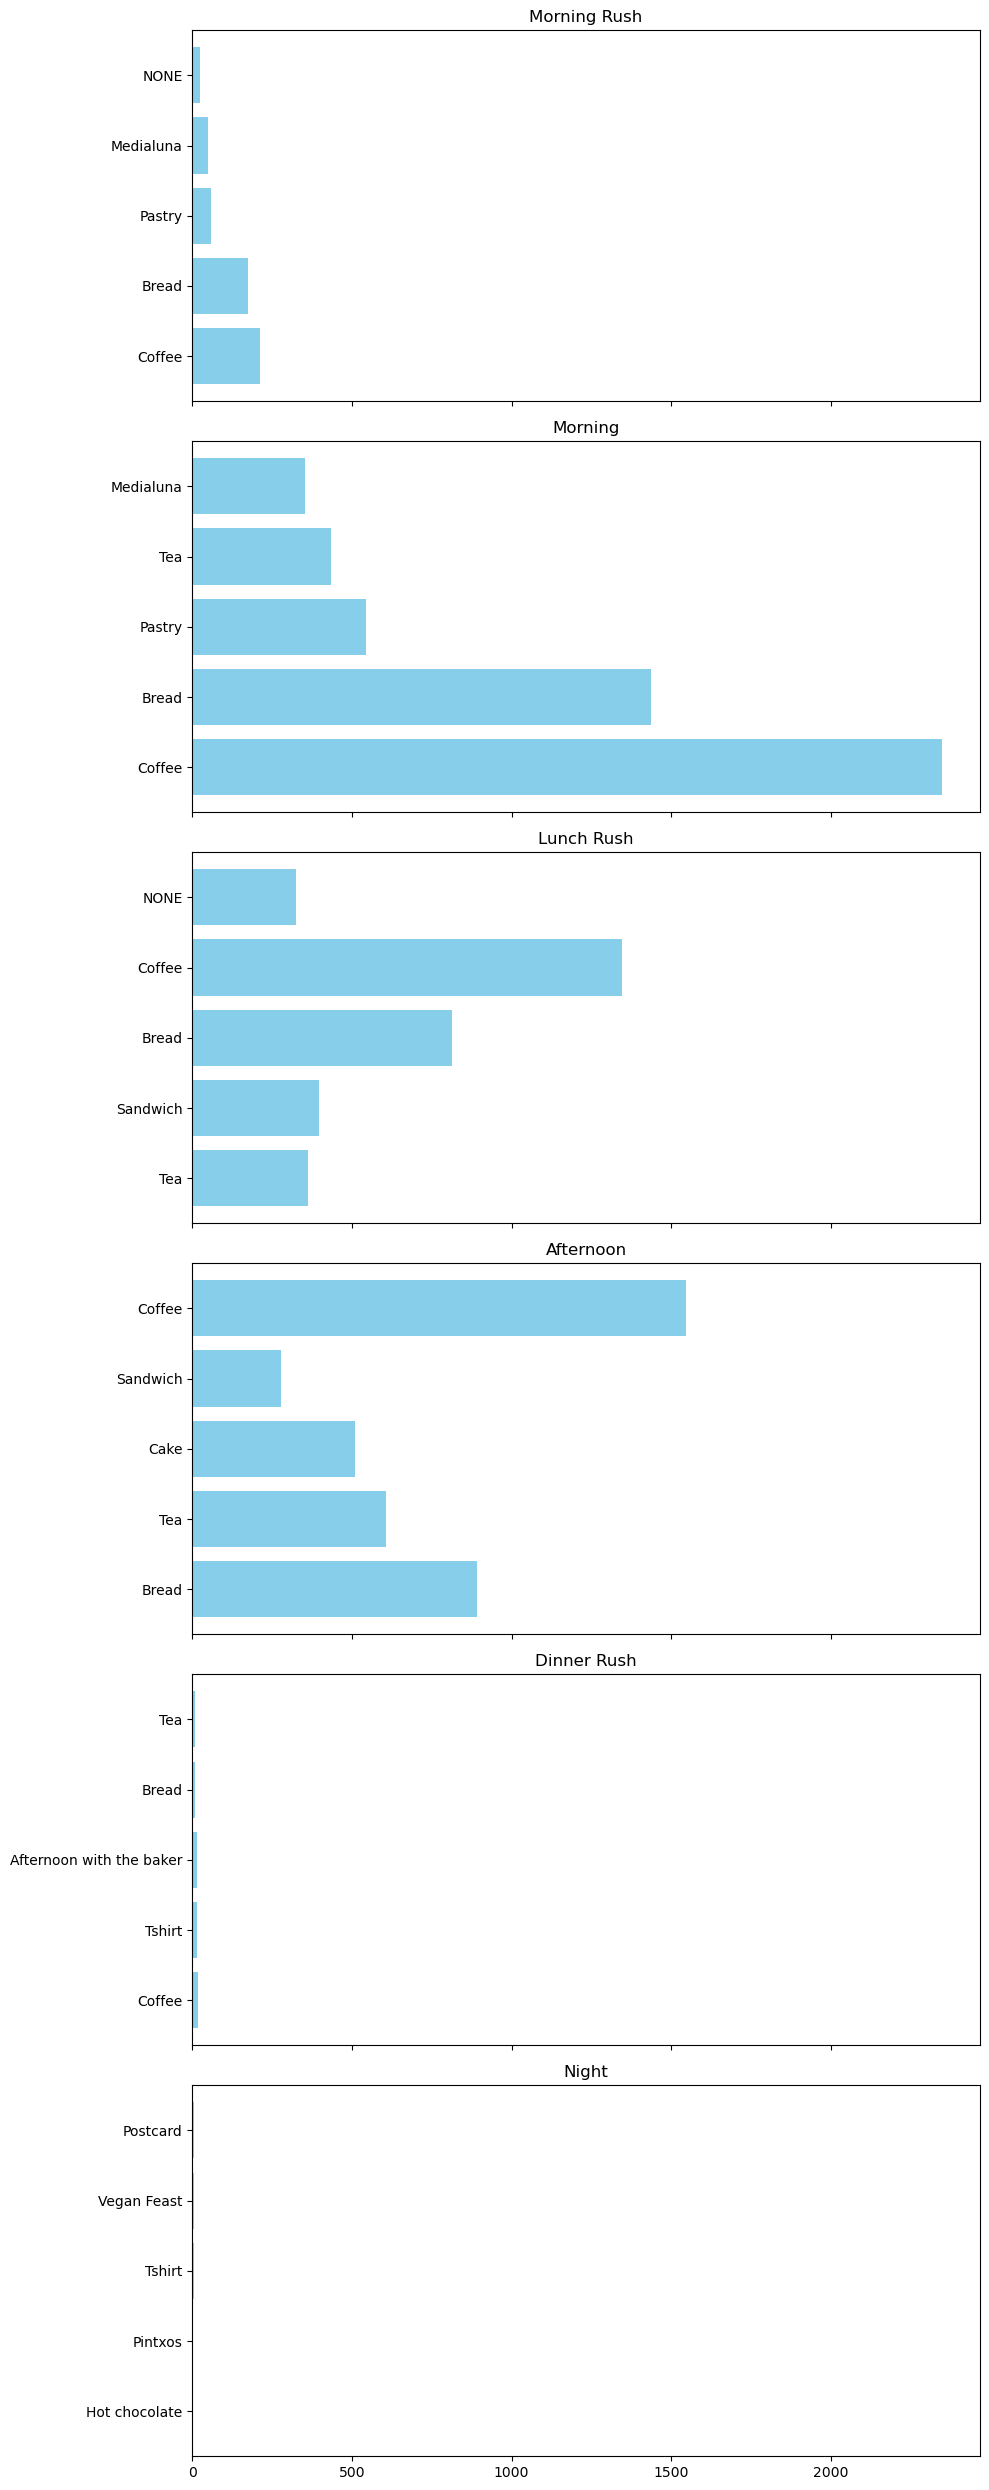

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# load dataset
transactions = pd.read_csv("C:\\Users\\Ali\\Desktop\\project4ali\\BreadBasket_DMS.csv")

# extract time periods for the transactions
def get_time_period(hour):
    if hour < 9:
        return "Morning Rush"
    elif hour < 12:
        return "Morning"
    elif hour < 14:
        return "Lunch Rush"
    elif hour < 18:
        return "Afternoon"
    elif hour < 20:
        return "Dinner Rush"
    else:
        return "Night"

transactions['hour'] = pd.to_datetime(transactions['Time'], format='%H:%M:%S').dt.hour
transactions['time_period'] = transactions['hour'].apply(get_time_period)

# count occurrences of each item for each time period
item_counts = transactions.groupby(['time_period', 'Item']).size().reset_index(name='count')

# find the top 5 most popular items for each time period and sort by the count
sorted_item_counts = item_counts.sort_values(['time_period', 'count'], ascending=[True, False])
top_items_by_period = sorted_item_counts.groupby('time_period').head(5).reset_index(drop=True)

# the order of the time periods
time_periods_order = [
    "Morning Rush",
    "Morning",
    "Lunch Rush",
    "Afternoon",
    "Dinner Rush",
    "Night"
]

# sort top_items_by_period based on the order of time periods to make it easier to analyze
top_items_by_period['time_period'] = pd.Categorical(top_items_by_period['time_period'], categories=time_periods_order, ordered=True)
top_items_by_period = top_items_by_period.sort_values(by='time_period')

# save transformed dataset to CSV file
transactions.to_csv("C:\\Users\\Ali\\Desktop\\project4ali\\transformed_dataset.csv", index=False)

# summarized report of the top 5 most popular items for each period
with open("C:\\Users\\Ali\\Desktop\\project4ali\\top_items_summary.txt", "w") as f:
    for period, group in top_items_by_period.groupby('time_period'):
        f.write(f"Top 5 items in {period}:\n")
        for index, row in group.sort_values(by='count', ascending=False).iterrows():
            f.write(f"{row['Item']}: {row['count']} occurrences\n")
        f.write("\n")

# plot the info
# Plotting the top items by period
fig, axes = plt.subplots(len(time_periods_order), 1, figsize=(10, 25), sharex=True)

for i, period in enumerate(time_periods_order):
    period_data = top_items_by_period[top_items_by_period['time_period'] == period]
    axes[i].barh(period_data['Item'], period_data['count'], color='skyblue')
    axes[i].set_title(period)
    axes[i].invert_yaxis()  # to have the highest count at the top

plt.tight_layout()

# save the plot before showing it
plt.savefig('C:\\Users\\Ali\\Desktop\\project4ali\\top_items_plot.png')

# display the plot
plt.show()
